In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string

import matplotlib
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from pymongo import MongoClient
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    plot_roc_curve,
    precision_score,
    recall_score,
    plot_confusion_matrix
)
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set_theme()
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import plot_roc_curve, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math
from collections import defaultdict

In [2]:
#data = pd.read_json('Movies_and_TV_5.json', lines=True)

In [3]:
odf = pd.DataFrame(reviews_cleaned.find({}, {'stemmed':0}))
odf['stars'] = odf['overall'].apply(int)
odf['review_char_length'] = odf['reviewText'].apply(len)
odf = odf[(odf['review_char_length']>500) & (odf['review_char_length'] < 3000)] 

NameError: name 'reviews_cleaned' is not defined

In [7]:
odf

,_id,reviewerID,asin,reviewerName,reviewText,helpful,overall,summary,unixReviewTime,reviewTime,lemmatized,stars,review_char_length
6,607dba47dc472093f35639ff,A5NYUBEKXFLX5,0005019281,"B. Babb ""kites0852""",This is the American adaptation of the Charles...,"[1, 1]",5,A MUST-HAVE FOR ANY VIDEO CHRISTMAS COLLECTION!!,1230595200,"12 30, 2008",american adaptation charles dickens classic in...,5,760
13,607dba47dc472093f3563a06,A1GHUN5HXMHZ89,0005019281,"C. A. Luster ""The Rook""",The first time I saw &#34;An American Christma...,"[0, 0]",5,An American Christmas Carol,1387670400,"12 22, 2013",first time saw 34 american christmas carol 34 ...,5,601
22,607dba47dc472093f3563a0f,A1PXS5N63PS6WR,0005019281,"Dan Willis ""Author""",I must confess to being a bit of a coinsure of...,"[2, 3]",5,Change can be good,1008115200,"12 12, 2001",must confess bit coinsure dickens classic tale...,5,1070
32,607dba47dc472093f3563a19,A10O6QLKFO3R6R,0005019281,easyreader50,Most of us remember Henry Winkler in the role ...,"[0, 0]",5,Another side of Henry,1300752000,"03 22, 2011",u remember henry winkler role arthur fonz fonz...,5,606
34,607dba47dc472093f3563a1b,AZB4CQ9JZSUQB,0005019281,Eric Pregosin,"When this first aired in 1979, I enjoyed it so...","[3, 4]",5,A Christmas Carol to be remembered,1012176000,"01 28, 2002",first aired 1979 enjoyed much clean forgot quo...,5,749
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1697521,607dd28edc472093f37020ea,A1Q3GEO516I4VK,B00LH9ROKM,Twisted Slasher,"While not nearly as terrifying as say, The Con...","[0, 0]",4,"Intense and compelling, with a dose of silly o...",1404518400,"07 5, 2014",nearly terrifying say conjuring deliver u evil...,4,1342
1697522,607dd28edc472093f37020eb,AU73NIGESSIRE,B00LT1JHLW,"Alan ""Rockin' America's Dairyland""",Let's be clear - the 5 stars are for the serie...,"[25, 88]",5,"July 17, 2014 - the first day of pre-order (wi...",1405555200,"07 17, 2014",let clear 5 star series product review july 17...,5,2214
1697529,607dd28edc472093f37020f2,A17W587EH23J0Q,B00LT1JHLW,"Ron2900 ""Ron""","Finally, the holy grail of tv-on-dvd boxsets i...","[32, 48]",5,"HOLY BAT-BOXSET, BATMAN... I never thought thi...",1405641600,"07 18, 2014",finally holy grail tv dvd boxsets coming blu r...,5,769
1697530,607dd28edc472093f37020f3,A3DE438TF1A958,B00LT1JHLW,thomas henry,Could this be a true or I'm i dreaming batman ...,"[3, 10]",5,prayers have been answered because batman 60s ...,1405728000,"07 19, 2014",could true dreaming batman favorite comic book...,5,538


In [9]:
wc.insert_many(odf.to_dict('records'))

In [8]:
s = (pd.DataFrame(reviews_cleaned.find({}, {'stemmed':0, 'reviewText': 0}))['lemmatized'])

# creating word count dict

In [9]:
word_count_dict = defaultdict(int)
for lst in s:
    for word in tokenize(lst):
        word_count_dict[word]+=1
word_count_dict

defaultdict(int,
            {'charming': 21090,
             'version': 200371,
             'classic': 160344,
             'dicken': 330,
             'tale': 57761,
             'henry': 22844,
             'winkler': 731,
             'make': 505159,
             'good': 817912,
             'showing': 32999,
             'scrooge': 3909,
             'character': 596409,
             'even': 470693,
             'though': 213965,
             'know': 315509,
             'happen': 44954,
             'enough': 155334,
             'change': 71110,
             'better': 292578,
             'average': 27611,
             'love': 483332,
             'christmas': 51226,
             'carol': 8800,
             'emotionally': 12722,
             'moving': 42055,
             'dickens': 3782,
             'like': 913514,
             'movie': 2335648,
             'sigh': 2482,
             'get': 612057,
             'wrong': 73382,
             'wonderful': 111341,
             'a

In [10]:
d = word_count_dict
sorted_values = list(reversed(sorted(d.values()))) # Sort the values
sorted_dict = {}
for i in sorted_values:
    for k in d.keys():
        if d[k] == i:
            sorted_dict[k] = d[k]
            break


In [11]:
sorted_dict

{'movie': 2335648,
 'film': 1789513,
 'one': 1344461,
 'like': 913514,
 'good': 817912,
 'time': 771349,
 'great': 731794,
 'story': 676305,
 'get': 612057,
 'character': 596409,
 'well': 571365,
 'would': 559335,
 'dvd': 533749,
 'see': 528969,
 'really': 528601,
 'show': 511226,
 'make': 505159,
 'first': 495239,
 'love': 483332,
 'much': 478266,
 'even': 470693,
 'also': 458787,
 'scene': 433900,
 'way': 398129,
 'watch': 383787,
 'best': 381328,
 'life': 375391,
 'two': 367774,
 'series': 361227,
 'year': 360362,
 'people': 347188,
 'quot': 344266,
 'many': 340350,
 'thing': 335230,
 'go': 322334,
 'think': 316950,
 'know': 315509,
 'still': 312011,
 'could': 304635,
 'made': 300819,
 'season': 300692,
 'little': 298920,
 'star': 298068,
 'better': 292578,
 'never': 287968,
 'end': 286285,
 'set': 283392,
 'episode': 281993,
 'take': 274705,
 'new': 274227,
 'come': 273726,
 'say': 272285,
 'man': 271311,
 'back': 270646,
 'look': 267280,
 'actor': 264076,
 'fan': 259290,
 'seen': 

Text(0.5, 0, 'Count (in millions)')

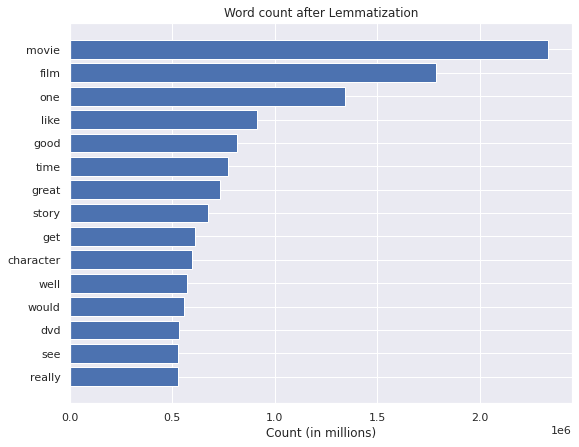

In [34]:
fig, ax = plt.subplots(figsize=(9,7))
x = list(reversed(list(sorted_dict.keys())[:15]))
y = list(reversed(list(sorted_dict.values())[:15])) 
ax.barh(x, y)
ax.set_title('Word count after Lemmatization')
ax.set_xlabel('Count (in millions)')

In [25]:
y

[528601,
 528969,
 533749,
 559335,
 571365,
 596409,
 612057,
 676305,
 731794,
 771349,
 817912,
 913514,
 1344461,
 1789513,
 2335648]

In [2]:
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
db = client['amazon_reviews']
reviews = db['reviews']
reviews_cleaned = db['reviews_cleaned']
balanced_10k = db['balanced_10k']
balanced_40k = db['balanced_40k']
sample_test = db['sample_test']
wc = db['wc']

In [3]:
balanced_10k_each = pd.DataFrame(balanced_10k.find({}, {'stemmed': 0}))
balanced_40k_each = pd.DataFrame(balanced_40k.find({}, {'stemmed': 0}))

In [74]:
sample = pd.DataFrame(sample_test.find({}, {'stemmed':0}))
sample['stars'] = sample['overall'].apply(int)
sample['review_char_length'] = sample['reviewText'].apply(len)
sample = sample[(sample['review_char_length']>500) & (sample['review_char_length'] < 3000)]

In [4]:
original_df = pd.DataFrame(reviews.find({}))

Text(0, 0.5, 'Rating count')

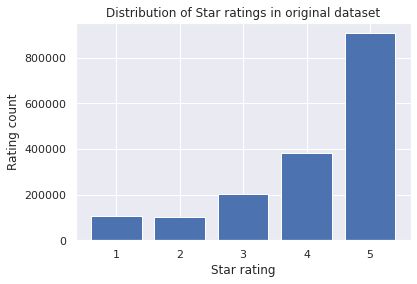

In [17]:
#original_df['overall'].value_counts()
original_df['stars'] = original_df['overall'].apply(int)
fig, ax = plt.subplots()
ax.bar(original_df['stars'].value_counts().index,original_df['overall'].value_counts())
ax.set_xlabel('Star rating')
ax.set_title('Distribution of Star ratings in original dataset')
ax.set_ylabel('Rating count')

In [ ]:
67273 UNIQUE REVIEWERS

In [4]:
df = pd.DataFrame(reviews_cleaned.find({}, {'stemmed':0}))

In [5]:

df = df.drop(['_id', 'reviewerID', 'asin', 'reviewerName', 'summary', 'unixReviewTime', 'reviewTime'], axis=1)
#df= df.drop(['reviewText'], axis=1)
df['review_char_length'] = df['reviewText'].apply(len)
df['stars'] = df['overall'].apply(lambda x: int(x))
#df = df[(df['review_char_length']>500) & (df['review_char_length'] < 3000)]
#df['lemmatized'].apply(lambda x: tokenize(x))

32766


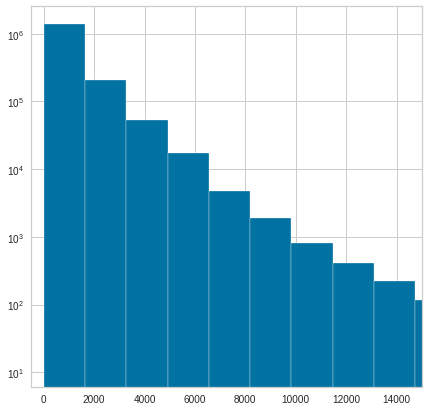

In [19]:
fig, ax = plt.subplots(figsize=(7,7))
ax.hist(df['review_char_length'], bins=20, log=True)
ax.set_xlim(-500,15000)
print(df['review_char_length'].max())

In [6]:
df= df.drop(['reviewText'], axis=1)

In [14]:
df

,helpful,overall,lemmatized,review_char_length,stars
6,"[1, 1]",5,american adaptation charles dickens classic in...,760,5
13,"[0, 0]",5,first time saw 34 american christmas carol 34 ...,601,5
22,"[2, 3]",5,must confess bit coinsure dickens classic tale...,1070,5
32,"[0, 0]",5,u remember henry winkler role arthur fonz fonz...,606,5
34,"[3, 4]",5,first aired 1979 enjoyed much clean forgot quo...,749,5
...,...,...,...,...,...
1697521,"[0, 0]",4,nearly terrifying say conjuring deliver u evil...,1342,4
1697522,"[25, 88]",5,let clear 5 star series product review july 17...,2214,5
1697529,"[32, 48]",5,finally holy grail tv dvd boxsets coming blu r...,769,5
1697530,"[3, 10]",5,could true dreaming batman favorite comic book...,538,5


In [6]:
df['review_char_length'] = df['reviewText'].apply(len)
df['stars'] = df['overall'].apply(lambda x: int(x))
df = df[(df['review_char_length']>500) & (df['review_char_length'] < 3000)]

In [50]:
#df['reviewerName'].value_counts()

Amazon Customer                          3508
Michael Butts                            2156
Tsuyoshi                                 2121
Grady Harp                               1911
Hiram Gomez Pardo                        1887
                                         ... 
Evigan "d-(O.o)-b"                          1
Jonquil                                     1
Gregory L Leber                             1
Scottiboy "I've seen a movie or two"        1
Amazon Customer "Baghdad Cinemaphile"       1
Name: reviewerName, Length: 67273, dtype: int64

In [7]:
one_star_reviews = df[df['stars'] == 1]
two_star_reviews = df[df['stars'] == 2]
three_star_reviews = df[df['stars'] == 3]
four_star_reviews =df[df['stars'] == 4]
five_star_reviews = df[df['stars'] == 5]

<BarContainer object of 5 artists>

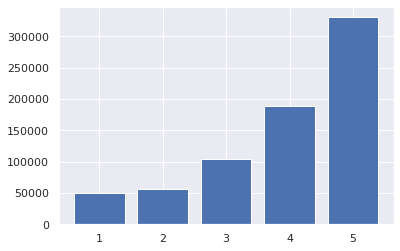

In [17]:
fig, ax = plt.subplots()
ax.bar(df['stars'].value_counts().index,df['overall'].value_counts())

<BarContainer object of 5 artists>

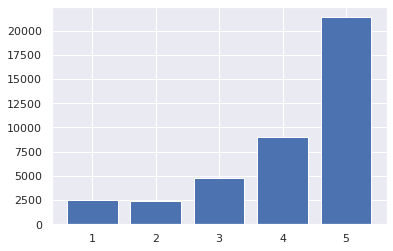

In [9]:
fig, ax = plt.subplots()
ax.bar(sample['stars'].value_counts().index,sample['stars'].value_counts())

In [14]:
balanced_10k_each = pd.concat([one_star_reviews.iloc[:10000], two_star_reviews.iloc[:10000], three_star_reviews.iloc[:10000], four_star_reviews.iloc[:10000], five_star_reviews.iloc[:10000]])
balanced_40k_each = pd.concat([one_star_reviews.iloc[:40000], two_star_reviews.iloc[:40000], three_star_reviews.iloc[:40000], four_star_reviews.iloc[:40000], five_star_reviews.iloc[:40000]])
balanced_40k_each['stars'].value_counts()

5    40000
4    40000
3    40000
2    40000
1    40000
Name: stars, dtype: int64

In [5]:
import nltk
nltk_stopwords = nltk.corpus.stopwords.words('english')
tokenizer = nltk.RegexpTokenizer(r"\w+")

stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def NLP_cleaner_mongodb(pandas_df, collection, document_column_name = 'reviewText'):
    '''
    takes pandas dataframe and inserts entries into mongodb collection with lemmatized text
    '''
    '''
    df = pandas_df
    df['unicode'] = df[document_column_name].str.encode('ascii', 'ignore').str.decode('ascii')
    df['lower'] = df['unicode'].apply(lambda x: x.lower())
    df['remove_punct'] = df['lower'].apply(lambda x: tokenizer.tokenize(x))
    df['no_stopwords'] = df['remove_punct'].apply(lambda x: remove_stopwords(x))
    df['lemmatized'] = df['no_stopwords'].apply(lambda x: lemmatize_text(tokenize(x)))
    '''
    for row_num in range(pandas_df.shape[0]):
        row = (pandas_df.iloc[row_num])
        unicode = row[document_column_name].encode('ascii', 'ignore').decode('ascii')
        lower = unicode.lower()
        remove_punct = tokenize(lower)
        no_stopwords = remove_stopwords(remove_punct)
        lemmatized = lemmatize_text(tokenize(no_stopwords))
        stemmed = stem_text(tokenize(no_stopwords))
        collection.insert_one({'reviewerID': str(row['reviewerID']), 'asin':str(row['asin']), 'reviewerName':row['reviewerName'], 'reviewText': row['reviewText'], 'helpful':row['helpful'], 'overall':str(row['overall']), 'summary':row['summary'], 'unixReviewTime':str(row['unixReviewTime']), 'reviewTime':row['reviewTime'], 'lemmatized':lemmatized, 'stemmed':stemmed})
    
    
    


In [6]:
#NLP_cleaner_mongodb(df, reviews_cleaned)

In [7]:


def remove_punctuation(comment):
    no_punct = [word for word in comment if word not in string.punctuation]
    return ' '.join(no_punct)

def tokenize(comment):
    token = [word.lower() for word in tokenizer.tokenize(comment)]
    return token

def remove_stopwords(comment):
    no_stops_words = [word for word in comment if word not in nltk_stopwords]
    return ' '.join(no_stops_words)

def stem_text(comment):
    stem = [stemmer.stem(word) for word in comment]
    after_stem = ' '.join(stem)
    return after_stem

def lemmatize_text(comment):
    lemma = [lemmatizer.lemmatize(word) for word in comment]
    after_lemma = ' '.join(lemma)
    return after_lemma


In [36]:
multiNB(balanced_40k_each, 'lemmatized', max_features=20000,max_iter=10000)

((0.50635,
  array([0.52634137, 0.44445866, 0.43458571, 0.46310935, 0.63024203]),
  array([0.6806184 , 0.43014615, 0.32031153, 0.44224962, 0.66305307])),
 array([[5415, 1686,  413,  243,  199],
        [2537, 3473, 1219,  582,  263],
        [1142, 1795, 2591, 1845,  716],
        [ 631,  572, 1322, 3515, 1908],
        [ 563,  288,  417, 1405, 5260]]),
 MultinomialNB())

<AxesSubplot:>

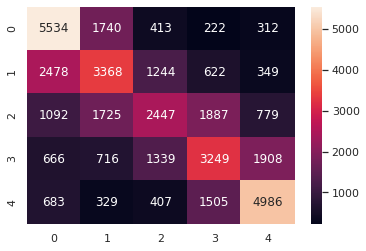

In [37]:
sns.heatmap([[5534, 1740,  413,  222,  312],
        [2478, 3368, 1244,  622,  349],
        [1092, 1725, 2447, 1887,  779],
        [ 666,  716, 1339, 3249, 1908],
        [ 683,  329,  407, 1505, 4986]], annot=True, fmt='g')

In [41]:
tup = rf_test(balanced_10k_each, 'lemmatized', max_depth=15, n_est=3000, max_feat = 2500, new_stop_words = ['one', 'two', 'three', 'four', 'five'])
tup

(40000, 2500)
Train score: 0.7714


((0.4307, 0.4307, 0.4307),
 array([[1334,  238,  116,   73,  206],
        [ 747,  472,  353,  200,  300],
        [ 361,  286,  512,  423,  414],
        [ 206,  103,  314,  641,  720],
        [ 153,   51,  130,  299, 1348]]),
 RandomForestClassifier(class_weight='balanced_subsample', max_depth=15,
                        n_estimators=3000),
 <40000x2500 sparse matrix of type '<class 'numpy.float64'>'
 	with 2699783 stored elements in Compressed Sparse Row format>)

<AxesSubplot:>

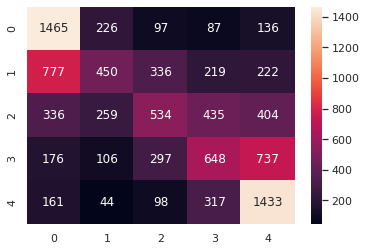

In [28]:
sns.heatmap([[1465,  226,   97,   87,  136],
        [ 777,  450,  336,  219,  222],
        [ 336,  259,  534,  435,  404],
        [ 176,  106,  297,  648,  737],
        [ 161,   44,   98,  317, 1433]], annot=True, fmt='g')

In [38]:
tup =logreg(balanced_40k_each, 'lemmatized')
tup

((0.514,
  array([0.60461055, 0.46920387, 0.42878956, 0.44972461, 0.58879964]),
  array([0.65271493, 0.43212782, 0.38187662, 0.44174635, 0.66532207])),
 array([[5193, 1701,  495,  226,  341],
        [2088, 3489, 1577,  528,  392],
        [ 705, 1587, 3089, 1883,  825],
        [ 312,  451, 1546, 3511, 2128],
        [ 291,  208,  497, 1659, 5278]]),
 LogisticRegression(max_iter=2000))

In [56]:
make_heatmap([[5186, 1737,  520,  215,  301],
        [2129, 3417, 1537,  527,  368],
        [ 691, 1578, 3126, 1808,  843],
        [ 291,  455, 1633, 3378, 2250],
        [ 346,  228,  482, 1621, 5333]])

TypeError: make_heatmap() missing 1 required positional argument: 'ax'

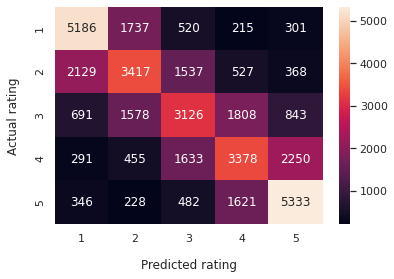

In [65]:
fig, ax = plt.subplots(figsize=(6,4))
make_heatmap([[5186, 1737,  520,  215,  301],
        [2129, 3417, 1537,  527,  368],
        [ 691, 1578, 3126, 1808,  843],
        [ 291,  455, 1633, 3378, 2250],
        [ 346,  228,  482, 1621, 5333]], ax)


In [6]:
def multiNB(pandas_df, text_column='reviewText', max_features = 1500, max_iter = 2000):

    X = pandas_df[text_column]
    y = pandas_df['overall']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

    tvectorizer = CountVectorizer(max_features = max_features, strip_accents='ascii', token_pattern=r'(?u)\b\w\w+\b',lowercase=True)
    X_train_tvectorizer = tvectorizer.fit_transform(X_train)
    X_test_tvectorizer = tvectorizer.transform(X_test)


    mnb = MultinomialNB()
    mnb.fit(X_train_tvectorizer, y_train)
    predict = mnb.predict(X_test_tvectorizer)

    a = (accuracy_score(y_test, predict))
    p = (precision_score(y_test, predict, average=None))
    r = (recall_score(y_test, predict, average=None))

    cm = confusion_matrix(y_test, predict)
    
    return (a,p,r), cm, mnb

In [7]:
def rf_test(pandas_df, text_column = 'reviewText', n_est=10, max_depth = 40, max_feat=None, new_stop_words = []):

    X = pandas_df[text_column]
    y = pandas_df['stars']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
    
    tvectorizer = TfidfVectorizer(max_features = max_feat, strip_accents='ascii', token_pattern=r'(?u)\b\w\w+\b', stop_words=stopwords.words('english')+new_stop_words)
    X_train_tvectorizer = tvectorizer.fit_transform(X_train)
    X_test_tvectorizer = tvectorizer.transform(X_test)
    
    print(X_train_tvectorizer.shape)
    
    rf = RandomForestClassifier(n_estimators = n_est, max_depth = max_depth, class_weight='balanced_subsample')
    rf.fit(X_train_tvectorizer, y_train)
    predict = rf.predict(X_test_tvectorizer)
    
    print(f'Train score: {rf.score(X_train_tvectorizer, y_train)}')
    
    a = (accuracy_score(y_test, predict))
    p = (precision_score(y_test, predict, average='micro'))
    r = (recall_score(y_test, predict, average='micro'))

    cm = confusion_matrix(y_test, predict)
    return (a,p,r), cm, rf, X_train_tvectorizer


In [9]:
def logreg(pandas_df, text_column = 'reviewText', max_features=1500, max_iter=2000):

    X = pandas_df[text_column]
    y = pandas_df['stars']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
    
    tvectorizer = TfidfVectorizer(max_features = max_features, strip_accents='ascii', token_pattern=r'(?u)\b\w\w+\b')
    X_train_tvectorizer = tvectorizer.fit_transform(X_train)
    X_test_tvectorizer = tvectorizer.transform(X_test)

    lr = LogisticRegression(max_iter=max_iter)
    lr.fit(X_train_tvectorizer, y_train)
    predict = lr.predict(X_test_tvectorizer)

    a = (accuracy_score(y_test, predict))
    p = (precision_score(y_test, predict, average=None))
    r = (recall_score(y_test, predict, average=None))
    cm = confusion_matrix(y_test, predict)
    return ((a,p,r),cm,lr)

In [58]:
def make_heatmap(cm, ax):
    categories = ['One', 'Two', 'Three', 'Four', 'Five']
    categories = ['1','2','3','4','5']
    
    sns.heatmap(cm, annot=True, fmt='g', xticklabels = categories, yticklabels = categories, ax=ax)
    ax.set_xlabel('Predicted rating', labelpad=15)
    ax.set_ylabel('Actual rating', labelpad=15)

In [11]:
def tdif_most_important_values_for_random_forest(tdif_vectorizer, fit_random_forest):    
    d= {}
    rf = fit_random_forest
    for imp,word in zip(list(rf.feature_importances_),tdif_vectorizer.get_feature_names()):
        d[word] = imp
    sorted_values = list(reversed(sorted(d.values()))) # Sort the values
    sorted_dict = {}
    for i in sorted_values:
        for k in d.keys():
            if d[k] == i:
                sorted_dict[k] = d[k]
                break
    return sorted_dict

In [84]:
def sort_predict_into_stars(array_or_list):
    ser = pd.Series(array_or_list)
    return ser.apply(lambda x: math.floor(x+.5))

In [21]:
pandas_df = balanced_40k_each
X = pandas_df['lemmatized']
y = pandas_df['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
    
tvectorizer = TfidfVectorizer(max_features = 1500, strip_accents='ascii', token_pattern=r'(?u)\b\w\w+\b', stop_words=stopwords.words('english')+['one', 'two', 'three' ,'four', 'five', 'movie', 'film', 'quot'])
X_train_tvectorizer = tvectorizer.fit_transform(X_train)
X_test_tvectorizer = tvectorizer.transform(X_test)
    
print(X_train_tvectorizer.shape)
    
rf = RandomForestClassifier(n_estimators = 400, max_depth = 15, class_weight='balanced_subsample')
rf.fit(X_train_tvectorizer, y_train)
predict = rf.predict(X_test_tvectorizer)

a = (accuracy_score(y_test, predict))
p = (precision_score(y_test, predict, average=None))
r = (recall_score(y_test, predict, average=None))

cm = confusion_matrix(y_test, predict)
(a,p,r), cm, rf, X_train_tvectorizer


(160000, 1500)


KeyboardInterrupt: 

In [21]:
dense_matrix = X_train_tvectorizer.todense()
feature_names = tvectorizer.get_feature_names()
sums = np.average(dense_matrix, axis=0)
sums = sums.tolist()[0]
import operator
feature_dictionary = {}
for k, v in zip(feature_names, sums):
    feature_dictionary[k] = v

sorted_d = dict(sorted(feature_dictionary.items(), key=operator.itemgetter(1), reverse=True))
sorted_d

{'like': 0.0339126385418547,
 'good': 0.030097281869872785,
 'time': 0.02915974693245386,
 'story': 0.026608358122323067,
 'character': 0.02630795361850332,
 'get': 0.025784069473977548,
 'dvd': 0.02503383285280097,
 'would': 0.024928119089489977,
 'scene': 0.024673190195376758,
 'great': 0.02434490702627554,
 'really': 0.023801075848605063,
 'make': 0.02325008228568807,
 'even': 0.02312909425338322,
 'see': 0.02292813177278491,
 'well': 0.022647604109507807,
 'much': 0.02231394975213064,
 'first': 0.021452608186541305,
 'bad': 0.019270536086022416,
 'way': 0.01905694105833673,
 'also': 0.01903705326411724,
 'people': 0.019002274658757885,
 'star': 0.018367694977924662,
 'love': 0.01834931873218069,
 'thing': 0.01812964884615173,
 'best': 0.017952435686752182,
 'watch': 0.017666665389461163,
 'could': 0.017658142853583577,
 'think': 0.017540525872758526,
 'made': 0.017530338528060335,
 'life': 0.0174218977406577,
 'better': 0.01732835543944827,
 'many': 0.017238528219998113,
 'year': 0

{'movie': 0.05368510604067714,
 'film': 0.046703850810812006,
 'quot': 0.03360110637246211,
 'like': 0.02326586066262509,
 'good': 0.020860164849875205,
 'time': 0.020077129074140748,
 'dvd': 0.018693977653676756,
 'story': 0.018160728308046884,
 'character': 0.017675311713946384,
 'get': 0.01740685860276381,
 'scene': 0.017285172557545084,
 'would': 0.017161173407424565,
 'great': 0.017010057967531928,
 'really': 0.016466425452646663,
 'see': 0.016023755770740923,
 'make': 0.015859943577551845,
 'even': 0.015808194461465575,
 'well': 0.01563983805381292,
 'much': 0.015355219902473873,
 'first': 0.01473267920912816,
 'version': 0.01353959505739131,
 'people': 0.013290404692996222,
 'bad': 0.013215914244637606,
 'also': 0.01319128468274956,
 'way': 0.013141328721699565,
 'love': 0.012659433329682033,
 'thing': 0.012652580261641707,
 'think': 0.012589839307874806,
 'star': 0.012519221456099012,
 'watch': 0.012516714803089064,
 'many': 0.012204541132389522,
 'could': 0.012135393131152123,

In [ ]:
#change boostrap sample size in random forest

In [73]:
def ROC(predict, X_test_tvectorizer, y_test):
    
    Predicted = predict
    Predicted_prob = lr.predict_proba(X_test_tvectorizer)
    fig, axs = plt.subplots(1, figsize=(10,10))
    y_test_dummy = pd.get_dummies(y_test).values
    targets = ['One star', 'Two stars', 'Three stars', 'Four stars', 'Five stars']
    for i in range(5):
        # ROC Curve
        fpr,tpr,thresholds = roc_curve(y_test_dummy[:,i],Predicted_prob[:,i])
        axs.plot(fpr,tpr,lw=3,label=targets[i])#,color=colors[i])
        axs.plot([0,1],[0,1],color='k',ls='--')
        axs.set_xlabel('False Positive Rate', fontsize=14)
        axs.set_ylabel('True Positive Rate', fontsize=14)
        axs.legend()
        axs.set_title('ROC Curve for Logistic Regression', fontsize=16)
        # Precision-Recall Curve
        '''
        precision,recall,thresholds = precision_recall_curve(y_test_dummy[:,i],Predicted_prob[:,i])
        axs[1].plot(recall,precision,label=targets[i])#,color=colors[i])
        axs[1].set_xlabel('Recall')
        axs[1].set_ylabel('Precision')
        axs[1].set_title('Precision-Recall Curve')
        axs[1].legend() 
        '''

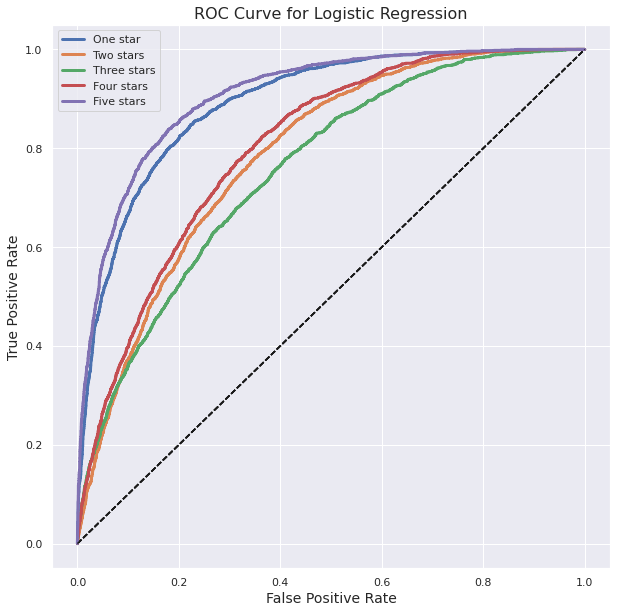

In [87]:
ROC(predict, X_test_tvectorizer, y_test)

# LOGREG

In [11]:
    #pandas_df, text_column = 'reviewText', max_features=1500, max_iter=2000:
    pandas_df = balanced_40k_each
    X = pandas_df['lemmatized']
    y = pandas_df['stars']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
    
    tvectorizer = TfidfVectorizer(max_features = 5000, strip_accents='ascii', token_pattern=r'(?u)\b\w\w+\b', stop_words = ['one', 'two', 'three', 'four', 'five'], ngram_range = (1,3))
    X_train_tvectorizer = tvectorizer.fit_transform(X_train)
    X_test_tvectorizer = tvectorizer.transform(X_test)

    lr = LogisticRegression(max_iter=3000)
    lr.fit(X_train_tvectorizer, y_train)
    predict = lr.predict(X_test_tvectorizer)
    
    #train score
    print(f'Train score: {lr.score(X_train_tvectorizer, y_train)}')
    
    a = (accuracy_score(y_test, predict))
    p = (precision_score(y_test, predict, average=None))
    r = (recall_score(y_test, predict, average=None))
    cm = confusion_matrix(y_test, predict)
    ((a,p,r),cm,lr)

KeyboardInterrupt: 

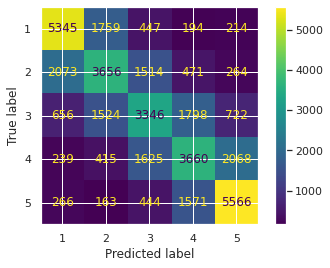

In [47]:
plot_confusion_matrix(lr, X_test_tvectorizer, y_test)

In [14]:




def logreg_coef_importance(fit_logreg, tvectorizer):
    feature_names = tvectorizer.get_feature_names()
    coef_matrix = fit_logreg.coef_
    dict_list = []
    for coef_row in coef_matrix:
        print(coef_row)
        d = {}
        for coef, feature_name in zip(coef_row, feature_names):
            d[feature_name] = coef
    
        sorted_values = list(reversed(sorted(d.values()))) # Sort the values
        sorted_dict = {}
        for i in sorted_values:
            for k in d.keys():
                if d[k] == i:
                    sorted_dict[k] = d[k]
                    break
        dict_list.append(sorted_dict)
        
    return dict_list

def top_x_features_per_star(dictionary_list, num, remove_duplicates = True):
    '''
    Takes list of dictionaries created by logreg_coef_importance and
    removes duplicates up until the up_until value
    
    '''
    done = False
    lstlst = [[],[],[],[],[]]
    while not done:
        for dictionary in dictionary_list:
            pass
        
        pass
        
    
        
        
        
dicts = logreg_coef_importance(lr, tvectorizer)
dicts_top_20 = [list(d.keys())[:20] for d in dicts]
dicts_top_10

[ 0.6210407   0.11991602  0.80480503 ...  3.57210448  1.4615466
 -0.1725536 ]
[-0.03900254 -0.47915461  0.56998702 ... -0.07263731  1.24066208
  0.37528488]
[-0.21989255 -0.36048835 -0.87710605 ... -1.27949564  0.42387202
 -0.25584941]
[-0.24746147 -0.13815438 -0.6931131  ... -1.00201398 -0.35302604
  0.87960242]
[-0.11468413  0.85788133  0.1954271  ... -1.21795755 -2.77305466
 -0.82648429]


[['worst',
  'waste',
  'boring',
  'awful',
  'garbage',
  'avoid',
  'mess',
  'terrible',
  'wasted',
  'poorly',
  'horrible',
  'bad',
  'trash',
  'redeeming',
  'nothing',
  'pointless',
  'stinker',
  'dull',
  'even',
  'insult'],
 ['disappointment',
  'unfortunately',
  'boring',
  'disappointing',
  'worst',
  'fails',
  'disappointed',
  'poorly',
  'dull',
  'mess',
  'wasted',
  'poor',
  'tedious',
  'mediocre',
  'overrated',
  'predictable',
  'mildly',
  'terrible',
  'waste',
  'instead'],
 ['worth look',
  'average',
  'mediocre',
  'worth seeing',
  'however',
  'okay',
  'watchable',
  'dvd edition',
  'uneven',
  'ok',
  'could much',
  'decent',
  'somewhat',
  'get wrong',
  'entertaining',
  'still',
  'though',
  'nonetheless',
  'alright',
  'overall'],
 ['well worth',
  'complaint',
  'enjoyable',
  'excellent',
  'fun',
  'still',
  'recommended',
  'bit',
  'enjoyed',
  'great',
  'solid',
  'perfect',
  'underrated',
  'love hate',
  '80',
  'fascinating

(array([15.,  9., 10.,  9.,  9.,  9., 12.,  9.,  9.,  9.]),
 array([ 0. ,  8.5, 17. , 25.5, 34. , 42.5, 51. , 59.5, 68. , 76.5, 85. ]),
 <BarContainer object of 10 artists>)

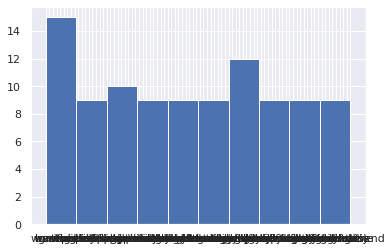

In [19]:
top20_each = dicts_top_20[0] + dicts_top_20[1] + dicts_top_20[2] + dicts_top_20[3] + dicts_top_20[4]

fig, ax = plt.subplots()
ax.hist(top20_each)

In [99]:
best ones


['worst',
  'waste',
  'boring',
  'awful',
  'garbage',
  'avoid',
  'mess',
  'terrible',
  'wasted',
  'poorly'],
 ['disappointment',
  'unfortunately',
  'boring',
  'disappointing',
  'worst',
  'fails',
  'disappointed',
  'poorly',
  'dull',
  'mess'],
 ['worth look',
  'average',
  'mediocre',
  'worth seeing',
  'however',
  'okay',
  'watchable',
  'dvd edition',
  'uneven',
  'ok'],
 ['well worth',
  'complaint',
  'enjoyable',
  'excellent',
  'fun',
  'still',
  'recommended',
  'bit',
  'enjoyed',
  'great'],
 ['highly recommended',
  'perfect',
  'excellent',
  'superb',
  'amazing',
  'best',
  'favorite',
  'great',
  'brilliant',
  'outstanding']]

SyntaxError: invalid syntax (<ipython-input-99-d6a258dde8bf>, line 1)

# test on sample data

In [78]:
    #pandas_df, text_column = 'reviewText', max_features=1500, max_iter=2000:
    pandas_df = balanced_40k_each
    X = pandas_df['lemmatized']
    y = pandas_df['stars']
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
    X_sample_test = sample['lemmatized']
    y_sample_test = sample['stars']
    
    
    #tvectorizer
    #X_train_tvectorizer
    #X_test_tvectorizer = tvectorizer.transform(X_test)
    X_sample_tvectorizer = tvectorizer.transform(X_sample_test)
    #lr = LogisticRegression(max_iter=3000)
    #lr.fit(X_train_tvectorizer, y_train)
    predict = lr.predict(X_sample_tvectorizer)
    
    #train score
    print(f'Train score: {lr.score(X_train_tvectorizer, y_train)}')
    
    a = (accuracy_score(y_sample_test, predict))
    p = (precision_score(y_sample_test, predict, average=None))
    r = (recall_score(y_sample_test, predict, average=None))
    cm = confusion_matrix(y_sample_test, predict)
    ((a,p,r),cm,lr)

Train score: 0.591525


((0.4759567630733275,
  array([0.39602978, 0.23961905, 0.3234083 , 0.39990678, 0.79212254]),
  array([0.69210755, 0.47293233, 0.41069992, 0.39393939, 0.51116816])),
 array([[ 798,  244,   53,   21,   37],
        [ 354,  629,  244,   64,   39],
        [ 205,  665, 1021,  446,  149],
        [ 186,  538, 1096, 1716,  820],
        [ 472,  549,  743, 2044, 3982]]),
 LogisticRegression(max_iter=3000))

In [69]:
#test
sample

,_id,reviewerID,asin,reviewerName,reviewText,helpful,overall,summary,unixReviewTime,reviewTime,lemmatized,stars
0,607dc264dc472093f35f6aae,A2EDZH51XHFA9B,B00005JLKN,"Robert Beveridge ""xterminal""","Red Dragon (Brett Ratner, 2002)It is the rare ...","[1, 3]",3,Do yourself a favor and see Manhunter first.,1038009600,"11 23, 2002",red dragon brett ratner 2002 rare film succeed...,3
1,607dcb28dc472093f3688743,A1179YPZA73EY6,B001H5X7I4,"Kelly A. Perkowski ""kellyperk62""",One of the best films of 2008. Robert Downey J...,"[1, 4]",5,Tropic Thunder,1231632000,"01 11, 2009",one best film 2008 robert downey jr steal show...,5
2,607dd1cedc472093f36f3c4f,AV6QDP8Q0ONK4,B00BUADSMQ,"The Movie Guy ""Movies from A to Z""",Bruce Willis revives the role of NYC cop John ...,"[1, 1]",3,TRY NOT TO MAKE A BIGGER MESS,1362441600,"03 5, 2013",bruce willis revives role nyc cop john mcclane...,3
3,607dcb09dc472093f3686cb5,A1OGAOL8G3CC8P,B001G0MFIS,nelly123,This is a great series and great actors I woul...,"[0, 0]",5,CSI,1371772800,"06 21, 2013",great series great actor would recommend anyon...,5
4,607dcd3adc472093f36a484e,AQD3DZDHXQA7N,B002ZMZB78,J. Nielsen,It might be a decent show - but the info they ...,"[0, 0]",3,Out of date / factually incorrect info on show...,1393200000,"02 24, 2014",might decent show info provided date stopped w...,3
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,607dbd97dc472093f359ea03,A2GK67Q4RFWJEB,6300989003,Amazon Customer,Of course it's a five star! My family watches ...,"[0, 0]",5,Classic!,1355875200,"12 19, 2012",course five star family watch every thanksgivi...,5
39996,607dbce3dc472093f3591300,A34HYQ9BQZPE78,1572522232,William Dorfer,"All right, I know that some people aren't goin...","[1, 1]",5,"DON'T KNOW ABOUT YOU GUYS, BUT I THINK THIS MO...",1214524800,"06 27, 2008",right know people going like movie love suspir...,5
39997,607dc50adc472093f36240c6,AQ71MANN7U01R,B0000WN1NG,George Kasprick,the case was nice and clean . the DVD it self ...,"[0, 1]",5,loved the movie,1372464000,"06 29, 2013",case nice clean dvd self looked brand new than...,5
39998,607dd084dc472093f36d9c76,ASJFUMUZ23GQH,B007K7IAGM,"Bryan R. ""acid reflux06""",This show is absolutely hilarious! After a few...,"[0, 0]",5,Web Therapy is Hilarious,1386201600,"12 5, 2013",show absolutely hilarious episode lisa kudrow ...,5


<AxesSubplot:>

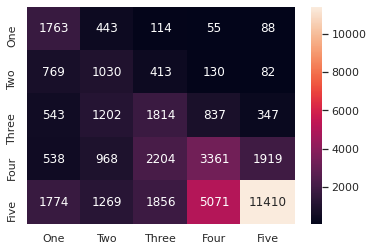

In [39]:
make_heatmap([[ 1763,   443,   114,    55,    88],
        [  769,  1030,   413,   130,    82],
        [  543,  1202,  1814,   837,   347],
        [  538,   968,  2204,  3361,  1919],
        [ 1774,  1269,  1856,  5071, 11410]])

# logreg 12 vs 45

In [112]:
    #pandas_df, text_column = 'reviewText', max_features=1500, max_iter=2000:
    pandas_df = balanced_40k_each
    X = pandas_df['lemmatized']
    y_binary = pandas_df['stars'].replace([1,2,3,4,5], ['12', '12', '3', '45', '45'])
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=2)
    
    tvectorizer = TfidfVectorizer(max_features = 4000, strip_accents='ascii', token_pattern=r'(?u)\b\w\w+\b', stop_words = ['one', 'two', 'three', 'four', 'five'], ngram_range = (1,2))
    X_train_tvectorizer = tvectorizer.fit_transform(X_train)
    X_test_tvectorizer = tvectorizer.transform(X_test)

    lr = LogisticRegression(max_iter=3000)
    lr.fit(X_train_tvectorizer, y_train)
    predict = lr.predict(X_test_tvectorizer)
    
    #train score
    print(f'Train score: {lr.score(X_train_tvectorizer, y_train)}')
    
    a = (accuracy_score(y_test, predict))
    p = (precision_score(y_test, predict, average=None))
    r = (recall_score(y_test, predict, average=None))
    cm = confusion_matrix(y_test, predict)
    ((a,p,r),cm,lr)

Train score: 0.7498125


((0.731925,
  array([0.76843252, 0.50517911, 0.7550212 ]),
  array([0.84099893, 0.29095203, 0.84491478])),
 array([[13403,  1174,  1360],
        [ 2674,  2341,  3031],
        [ 1365,  1119, 13533]]),
 LogisticRegression(max_iter=3000))

In [113]:
dicts = logreg_coef_importance(lr, tvectorizer)
dicts_top_10 = [list(d.keys())[:10] for d in dicts]
dicts_top_10

[-0.19791565  0.82357244  0.54746959 ...  2.24038214  1.14438541
  0.33170061]
[-0.1882573  -0.69993785 -0.2002121  ... -1.05203455  0.23928967
 -0.36872365]
[ 0.38617295 -0.12363459 -0.34725748 ... -1.18834759 -1.38367508
  0.03702304]


[['boring',
  'worst',
  'waste',
  'mess',
  'disappointment',
  'wasted',
  'poorly',
  'awful',
  'terrible',
  'redeeming'],
 ['mediocre',
  'average',
  'okay',
  'worth seeing',
  'get wrong',
  'however',
  'watchable',
  'stiller',
  'uneven',
  'ok'],
 ['well worth',
  'highly recommended',
  'excellent',
  'perfect',
  'superb',
  'highly recommend',
  'even better',
  'great',
  'amazing',
  'favorite']]

In [105]:
lr.coef_.shape

(1, 20000)

# using stars as numerical

In [98]:
regressor = DecisionTreeRegressor(random_state=0, max_depth = 20).fit(X_train_tvectorizer, y_train)
y = y.apply(lambda x: float(x))
mean_squared_error
cross_val_score(regressor, X_test_tvectorizer, y_test, cv=5).mean()

KeyboardInterrupt: 

In [99]:
print(f'Train RMSE: {(-cross_val_score(dt,X_test_tvectorizer,y_test,scoring="neg_root_mean_squared_error")).mean()}') 

Train RMSE: 1.6334331382121874


In [90]:
dt = DecisionTreeRegressor(random_state=0, max_depth = 45, max_features=10000)
dt.fit(X_train_tvectorizer, y_train)
dt_pred = dt.predict(X_test_tvectorizer)
#transform dt_pred to categorical
dt_pred = pd.Series(dt_pred).apply(lambda x: math.floor(x+.5))

In [ ]:
#gradient boosting

NameError: name 'gbr' is not defined

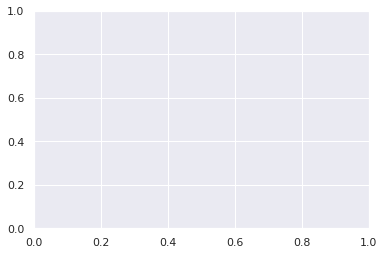

In [24]:
fig, ax = plt.subplots()
ax.hist(gbr.predict(X_sample_tvectorizer), bins=50)

In [ ]:
#get gini importance for random forest


# boosting

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
gbr = GradientBoostingRegressor(learning_rate=.125, n_estimators = 1500)
gbr.fit(X_train_tvectorizer, y_train)

GradientBoostingRegressor(learning_rate=0.125, n_estimators=1500)

In [80]:
for pred, act in zip(gbr.predict(X_test_tvectorizer), y_test):
    print(pred,act)

3.575254610984568 3
2.0604313375286343 3
4.241540268500693 5
1.7406984057932169 1
2.7686906668462803 1
4.378176661526796 5
2.2734789677380185 1
1.7754725661721202 1
2.488977149176681 2
4.191421745763448 5
3.236174828066867 3
4.686626320219191 5
1.6559445723308834 1
3.9286206512393265 4
4.023324335032464 5
3.291802428627354 4
2.7721243180181263 1
2.9042735204407086 2
1.3200651571343782 1
2.6782735081360785 2
1.8998818319032984 2
4.194928896924623 3
4.576528148175578 5
2.5178612132846503 2
1.8166591371831504 1
3.05451103626669 5
0.5351792886058568 1
3.482705541097909 4
3.727678809047868 4
2.4715896651801303 3
2.4942227649020676 4
3.655913165196392 3
2.7201027901035864 5
2.4473890868444976 1
2.1630688222773373 1
3.976999644893924 4
0.6561213806262182 1
3.9250832290740534 3
1.5395727181528973 1
2.068458324304058 3
3.082645394508736 5
1.8013601281738922 1
2.0087909401125192 2
4.5655295029094285 5
2.8026410353873614 3
3.187494320041809 3
2.9358670014879027 2
3.3454599961241134 5
2.1989980003

3.1319632984297203 4
2.2424013876439033 1
3.517124670603065 5
2.8700272937603475 4
2.5181749231917627 2
3.726212232749663 4
3.0279586715511186 4
3.6533446529524958 3
3.1734756650224507 3
3.7283554260524783 4
3.602523125515872 2
2.0630750210220064 1
3.2107770819812753 4
3.230355565100938 5
1.2684899966923469 1
3.9099626240322696 4
3.4130219457376785 4
4.406771548084704 4
2.8934751081091914 1
1.0079208422930903 1
4.335962664917024 5
5.147968076523446 5
2.8594589531757775 2
3.3298835052956024 3
2.5727408116091537 3
3.992113927305675 4
3.16466630302789 4
1.904799989735124 1
3.2051702294934072 2
1.992492359392676 1
3.0921548199192275 3
2.2278923754124524 3
2.7391637150468315 2
1.743362332018834 3
3.34094668817122 4
2.8518915973389025 3
3.823525253587177 4
4.644335214778513 5
2.702801709132978 1
2.0884385381861663 1
3.7065315273533206 2
3.104531677164992 3
1.6018329885705198 1
3.1891652447001526 5
3.5646136924334484 5
4.45271937939653 5
3.723792732340935 5
3.2136156350596927 5
3.288890836661

3.9311534905090046 4
2.3651648461314654 2
3.6640757299653153 3
3.4695989517384436 4
3.082361132406012 4
2.221100858565211 3
3.180468763505276 2
3.2665916068833862 3
3.902047526466831 5
3.002584916963736 2
4.040761339241284 5
3.8583099107733094 4
3.314991424867047 4
2.671331257778187 5
4.037654031160986 2
2.9525292706617363 5
3.8894423862027354 5
1.900832250490285 1
3.8885727356516955 5
3.5200640946958552 3
3.4294991902000524 1
4.2142445307213485 5
3.6198688061035296 5
3.1314128607486214 4
2.4640355284014 3
3.8778338600433973 5
2.3216334907894907 1
4.05792645202775 5
1.1556281479936208 1
2.9390071583576374 4
1.080172837381458 1
2.4300311050117847 3
2.437254671939111 3
2.2065477588873392 3
2.579827135237196 1
2.6360336370148016 2
4.022002867834589 5
2.821434174909818 2
4.126875157407115 5
1.6956909473498827 3
3.998677872672265 5
2.8411758331145553 3
2.3037528869917483 3
2.3186060282137375 1
2.763426478790312 3
3.316025464989644 2
3.7706376701081177 5
4.2112733083668505 5
3.34381961298884

3.032327300512689 4
4.091836327249106 5
1.7493826982007 4
4.312273409069179 5
3.0304232874400636 2
0.17602216889944255 1
0.691151376585014 1
2.727483122270843 2
3.5088669926669467 5
2.1775185084532476 4
1.7162592912279537 2
2.087401668250717 2
2.914584512167307 2
4.422711010728247 5
3.6262716736773273 4
3.4266241884311297 3
4.361905000533987 4
3.5490876616914067 2
3.9642805547621416 5
3.3067463302998337 2
1.6319716014631147 2
3.9310931598788375 4
3.052243563206643 3
2.4008369336068776 1
3.2130608704728583 3
2.9281371209904696 1
3.4195401314850224 4
0.9124796374543505 1
3.773397076485757 4
3.5231585121849944 5
3.600183549436847 4
2.9686874626148496 2
4.124890216722617 5
3.7192858586033277 3
3.842697967188423 4
1.7216579803543972 2
1.1392236236167568 1
3.0171459920041066 5
4.265200721408081 3
1.42539803409061 2
2.389115387092027 1
1.4452936811942116 1
1.7426531606690696 2
3.2954298598109957 4
3.463106469379255 5
3.6103250594379825 5
3.8822639019718035 4
2.418301536036634 1
2.815677590950

5.046926438943898 5
3.829423787042578 2
2.6286746130990233 1
1.8133041966139638 1
3.7554625869780756 5
3.3875746899550903 3
4.611296814541184 5
2.801926244030059 2
4.531893399686091 5
3.192849651004255 1
3.3683801456054607 2
0.8233700754837495 1
3.2450242535159517 4
1.8522789040421042 1
1.5167888367432925 1
2.349238736177448 3
3.0553459323611247 2
3.2451956805924658 3
3.3930355591716745 4
2.9853701018317214 3
4.068431766779158 5
1.9078663808283283 1
3.4914940117318327 5
2.909779459991492 5
2.9251410475830406 4
2.610986670562864 3
3.1225566245390937 1
3.1793214528560343 4
4.021050057513589 5
2.882012437324391 3
1.1238984966348413 1
4.779453840225453 5
3.132105242685146 3
3.19777568480909 3
3.316037579044521 2
1.1049693789269521 2
2.0942725821448853 2
3.008849599957334 4
4.01540754156116 5
2.8229053199060705 2
2.961602935381529 2
3.6671174285976713 4
2.385076434785143 2
4.126860946926422 5
4.020304574503502 4
3.682703481145328 5
3.948161168193115 5
1.6587099577247466 1
3.413126059657681 

3.634742454037366 4
3.8783762125899837 5
1.7432602854026233 1
3.485123048606859 3
3.727884132406501 4
2.9901107866316647 5
3.4903599368325295 3
3.3679217410147047 5
4.056448346752933 5
3.0166969784914115 1
3.2169007992609653 4
2.538278712845357 3
4.402146786996581 3
2.4650268531782844 3
1.8753562350951876 3
2.190694434904031 1
3.3130332445732518 4
2.6924392218816897 2
3.2854676696591194 3
2.5914695207569207 2
2.000683262075495 1
3.8804023261917884 5
1.5650495609326665 2
3.2730258586176073 5
4.4042195186785005 5
2.881764185348136 4
4.957076531119906 5
2.499242083640649 2
1.3209361593007134 1
1.7182060252905604 2
3.9580140823475327 4
4.049404473828296 3
3.1725160638547045 5
3.800909171994078 5
2.757593489406556 2
4.090187248144315 5
1.5862857912429902 1
3.130912361021234 3
0.8651868743146653 1
3.019952833802586 3
3.689056639811783 4
3.0493576628913326 3
3.88752667339912 5
3.018804125519675 5
2.818827394329617 3
2.036390892784471 1
3.3949856918583667 1
2.932027011861997 2
3.69162712764503

2.7025609550403127 1
3.1548830864010595 5
2.1737394300610715 1
3.9820258358203287 5
3.250980390732447 3
2.2282075662837757 3
3.2928595875291284 4
3.4810966760402615 3
3.239735299177764 5
4.02830232379606 4
1.9163639234324914 2
3.7610558316964022 4
2.901812896645612 1
3.6905010806618392 4
4.870348924381667 5
3.0483236658212127 2
2.2913788845469503 2
1.0834406838684512 1
2.4285357404103984 3
2.4166559102876266 2
3.59055249587548 2
2.369203492025245 1
3.226851363308586 5
3.026640456207231 3
2.3518567368837933 1
4.198327640649288 4
2.4775972940499837 1
2.183313450526877 2
2.2043117715862786 1
2.057427476695576 3
4.881232357270519 3
2.1696075268664172 1
2.826857533090157 4
1.7867817148617793 1
1.0989007922956524 1
3.6002370677821918 4
2.1480941996615908 1
2.9557004441246 2
2.6647561051507735 1
3.4172570699349167 4
3.6989595365807646 5
4.658281710742955 5
4.320545554318431 5
3.6460669314989484 5
3.5032419207328145 2
2.647689590698927 2
4.375355207925978 5
0.6837573636924205 1
1.5737225222163

3.150521726858851 2
2.2251506276568414 1
2.842732172281548 3
2.6886805045946294 3
5.034920898070775 5
3.4479093002895325 4
3.572278146172136 4
3.4261136275293333 4
4.764136774011686 5
3.4947788636500605 3
2.0648321476833273 1
3.199042981123138 3
3.1179592719668303 1
3.7591979889457594 5
2.943629310691548 3
3.127545442735324 3
3.163028175469929 4
3.7225602280992387 5
3.0941581385736234 2
3.875984435555706 4
3.389514678051814 5
3.498503918857046 3
3.273411616174924 3
3.015743554830601 4
2.852077890254835 3
4.582832967773998 5
2.5358762789463087 2
2.622667965077464 2
4.971899495270347 3
2.9935010383454492 3
2.9988721664275366 4
3.60778898103487 5
3.101425425702022 3
3.3590303427073898 4
2.876412471080237 3
1.7572040231301223 2
3.8302959670770726 5
1.2729231984177678 1
3.361040642828086 5
3.914478665238517 4
2.9969334948903508 2
3.3450400848999426 4
2.4010578206948354 1
2.9718521060841945 5
4.139603505578166 5
2.6533888820867064 2
2.939215378399441 4
2.7832204995901955 3
3.704272034165227 

1.9274121156422712 1
3.613099373102739 3
1.847801858580954 1
2.905175784732732 4
3.634270206250279 4
3.0781790624624903 4
3.217670950856518 4
1.1216373756072406 1
2.827753988905486 2
3.1228722629778036 4
3.186993168061285 4
1.0203689007538412 1
0.6556195824864165 2
3.386724357494902 2
3.8834607633175096 5
2.10718439234141 2
0.7894332083095356 1
4.253106061763517 5
2.311778670637405 1
2.524665331738064 1
2.0588474568627757 2
3.6739430065966032 5
3.0806604351968 2
3.939860479187394 5
3.240015418247242 4
2.52544764135402 4
2.171120628080496 1
4.0224425209504995 5
2.227047702686629 2
3.5262412981108016 4
4.498112160755584 4
2.4068619128928797 4
2.832701529395285 2
3.6585631610759823 4
3.6145182683721657 4
2.732186247272374 5
3.5170102512105883 4
1.9748758148762127 3
1.9495884683781604 1
1.7542053538087157 2
2.4207125125237576 3
5.065384407645369 5
1.161172136272466 1
3.2950569072652702 4
3.816946671978933 2
3.522798764085061 2
3.2167198607065957 3
3.2817389770331418 3
2.8571912718705215 1


3.156530202472324 4
2.4829973500532367 4
3.5100458995385555 3
4.1450304901932435 4
0.8434352685369173 1
2.9365687698914495 2
3.1317651363376573 3
4.148376498975039 3
2.222120172483438 1
2.8175171294969346 4
2.9709867542451422 4
1.3601643298521378 2
2.204203577417459 1
5.346666734181393 5
2.6389047002242174 3
3.039357336288956 3
3.351425283710482 5
2.9330536604864625 2
3.00443073778388 3
3.960499046005625 5
1.9380348141418944 2
2.9238816815299824 3
3.338000943045496 2
2.9803064252978078 2
3.5565909796435617 3
3.015725035243614 2
3.079930762743728 2
4.011457626330606 4
0.6027980853367845 2
3.3100342034534203 3
3.706222097957808 5
2.6853511855372303 2
3.2005772703397946 4
2.5720415766883753 2
4.1925213235411505 5


In [81]:
np.sqrt(mean_squared_error(y_test, gbr.predict(X_test_tvectorizer)))

0.9924567738532877

# LINREG

In [6]:
linreg = LinearRegression().fit(X_train_tvectorizer, y_train)
linreg_pred = linreg.predict(X_test_tvectorizer)

In [7]:
mean_squared_error(y_test,linreg_pred)

0.8654358355422098

In [8]:
#case study do residual plot for each star.

other ways for visualizing evaluations of models

build a classifier compare between 12 and 45

tkae beta coefficients which are the largest and take a word count of the two classes



SyntaxError: invalid syntax (<ipython-input-8-c95415edc01a>, line 3)

plot residuals, box plot
linearly separable

do startified 12 vs 45, speak to length of documents, average length of documents

                                              lemmatized  stars
13154  top great way describe garbage fan first mummy...      1
36546  one movie watch half hoping get better never t...      1
7269   film embarassment james bond series even bring...      1
386    okay okay give sound hearing throwing hope fut...      1
25504  supposed kind 5th rate jaw 3d lame movie get d...      1
...                                                  ...    ...
22329  morgan spurlock make much ado america obesity ...      1
25792  ok well bought day amazon 1 day shipping well ...      1
14200  racist cop john shaft rated sam jackson think ...      1
9299   biggest pile crap ive ever seen horrible mivie...      1
39821  said reviewer among nicolas cage best picture ...      1

[7959 rows x 2 columns]


ValueError: 'c' argument has 5 elements, which is inconsistent with 'x' and 'y' with size 40000.

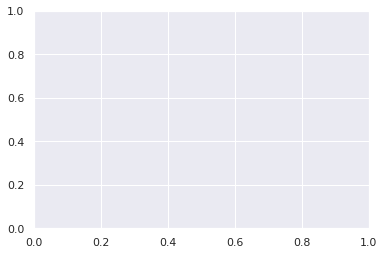

In [12]:
Xl = balanced_40k_each['lemmatized']
yl = balanced_40k_each['stars']
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, test_size=0.2, random_state=2)

l_test = pd.concat([Xl_test, yl_test],axis=1)
one_test = l_test[l_test.stars == 1]
two_test = l_test[l_test.stars == 2]
three_test = l_test[l_test.stars == 3]
four_test = l_test[l_test.stars == 4]
five_test =  l_test[l_test.stars == 5]

one_tvectorizer = tvectorizer.transform(one_test['lemmatized'])
two_tvectorizer = tvectorizer.transform(two_test['lemmatized'])
three_tvectorizer = tvectorizer.transform(three_test['lemmatized'])
four_tvectorizer = tvectorizer.transform(four_test['lemmatized'])
five_tvectorizer = tvectorizer.transform(five_test['lemmatized'])


print(one_test)

predicted = LinearRegression().fit(X_train_tvectorizer,y_train).predict(X_test_tvectorizer)
residuals = y_test - predicted
fig,ax = plt.subplots()
ax.scatter(y_test,residuals, alpha=.05, c=['#4c72b0', '#Dd8452', '#55a868', '#c44e52', '#8172b3'])
plt.axhline(y=0, color = 'r')
ax.set_xlabel('Predicted Star Rating')
ax.set_ylabel('Residuals');


In [26]:
predicted #negative residuals for 5 woudl classify higher than 5


array([3.1081632 , 1.51475577, 4.6771381 , ..., 4.0924267 , 3.36901935,
       1.43901747])

In [10]:
coefs = linreg.coef_
fn = tvectorizer.get_feature_names()
cfD = {}
for c,f in zip(coefs,fn):
    cfD[f] = c

sorted_values = list(reversed(sorted(cfD.values()))) # Sort the values
sorted_dict = {}
for i in sorted_values:
    for k in cfD.keys():
        if cfD[k] == i:
            sorted_dict[k] = cfD[k]
            break
sorted_dict

{'perfect': 2.4233944226232738,
 'superb': 2.423012062301763,
 'excellent': 2.393309207873477,
 'great': 2.3397966145960925,
 'favorite': 2.2984108174189064,
 'highly': 2.266383712142455,
 'apollo': 2.2226576657129855,
 'amazing': 2.1785795453462016,
 'best': 2.177077221171074,
 '8221': 2.1690303135576707,
 'brilliantly': 2.10938398995651,
 'schindler': 2.09749867028708,
 'outstanding': 2.049918812890945,
 'unforgettable': 2.0302014422923973,
 'hilarious': 2.0100492857971117,
 'perfection': 1.9753583021352537,
 'timeless': 1.9656659540464503,
 'funniest': 1.944451772089206,
 'astounding': 1.842752969026024,
 'complaint': 1.837137674466759,
 'gem': 1.7367723802094621,
 'brilliant': 1.7306430728892155,
 'awesome': 1.7218535745273214,
 'finest': 1.689111094856968,
 'wonderful': 1.6566931614065343,
 'today': 1.654338279754074,
 'refreshing': 1.6455286703243914,
 'priceless': 1.6348725571839506,
 'hooked': 1.609952943227571,
 'kudos': 1.6044903294775645,
 'perfectly': 1.6024958625799575,
 '

In [9]:
list(sorted_dict.keys())[2490:2510]

['college',
 'warren',
 'spin',
 'access',
 'scene',
 'al',
 'forest',
 'terrorist',
 'heard',
 'joined',
 'thread',
 'eat',
 'mccoy',
 'similar',
 'green',
 'charlton',
 'appearance',
 'stallone',
 'dee',
 'filmed']

In [ ]:
s = ((pd.DataFrame(reviews_cleaned.find({}, {'stemmed':0, 'reviewText': 0}))['lemmatized']).apply(lambda x: tokenize(x)).apply(pd.Series).stack().reset_index(drop = True))




In [12]:
s = s.apply(pd.Series).stack().reset_index(drop = True)

KeyboardInterrupt: 

In [33]:
#EDA
s = 'nightmare on'
elm = balanced_40k_each[balanced_40k_each['reviewText'].apply(lambda x: True if 'van damme' in x.lower() else False)]

In [36]:
pd.set_option('display.max_colwidth', None)
elm.tail(40)

,_id,reviewerID,asin,reviewerName,reviewText,helpful,overall,summary,unixReviewTime,reviewTime,lemmatized,review_char_length,stars
175725,607dbb35dc472093f3572431,A2ZB8B7VQONZA6,0783227892,"fmwaalex ""fmwaalex""","HARD TARGETThis is absolutely one of my favorite Van Damme films of all time; I mean come on look at the line up. Jean-Claude Van Damme, Lance Henriksen, Sam Raimi, John Woo, Ted Raimi, and Rob Tapert how could you not like this movie. This movie is a great thrill ride filled with all the action you could want, and great villains, Arnold Vosloo in particular as Van Clef. This has got to be one of Van Damme's best movies he has been apart of.The story is basically just about some rich guys hunting bums through out the concrete jungle. It turns out that one of the people they hunted had a daughter that is trying to find him, naturally questions arise and that doesn't sit well with them. This is were Van Damme comes in and is hired by the woman to help find her father, what they find is a group of people in a very bad business. From here fights break out, gunshots are heard, and explosions can be seen for miles, what a great movie.Performance wise this is a great movie as well, Van Damme is excellent in this film and never really gets the credit he deserves as an actor. Of course Yancy Butler as our lead actress is good as well and is very believable in her role. Villain wise is were this film really shines; this movie has two of the best villains ever for a film. First is the brilliant Lance Henriksen playing the lead villain, and as usual he is great and really determined to get what he wants. Which is also the reason why Arnold Vosloo is so extremely good as Van Clef, he is just as cold, vindictive, and evil as Lance but he is the calmer of the two who knows when to walk away. It is the difference between the two that make them such a great on screen team. Also on a side note the ever great Ted Raimi makes a guest appearance on this film, great to see him.Of course on the production side this film is lined up with all time greats, Raimi, Tapert, and Woo. Of course Sam Raimi and Rob Tapert come through as Executive Producers and hired on the legendary John Woo as the director. Naturally John Woo's style shines through on this film and make it an explosive action packed thrill ride. Of course a lot of credit needs to go to writer Chuck Pfarrer who wrote a great action film that delivers. He did an excellent job with an idea that has been done many times through books and films alike.Over all this is a great movie for a day off from work, grab the drinks and kick back.","[0, 0]",5,"RAIMI, TAPERT, WOO, VAN DAMME, HENRIKSEN, VOSLOO",1218067200,"08 7, 2008",hard targetthis absolutely one favorite van damme film time mean come look line jean claude van damme lance henriksen sam raimi john woo ted raimi rob tapert could like movie movie great thrill ride filled action could want great villain arnold vosloo particular van clef got one van damme best movie apart story basically rich guy hunting bum concrete jungle turn one people hunted daughter trying find naturally question arise sit well van damme come hired woman help find father find group people bad business fight break gunshot heard explosion seen mile great movie performance wise great movie well van damme excellent film never really get credit deserves actor course yancy butler lead actress good well believable role villain wise film really shine movie two best villain ever film first brilliant lance henriksen playing lead villain usual great really determined get want also reason arnold vosloo extremely good van clef cold vindictive evil lance calmer two know walk away difference two make great screen team also side note ever great ted raimi make guest appearance film great see course production side film lined time great raimi tapert woo course sam raimi rob tapert come executive producer hired legendary john woo director naturally john woo style shine film make exp

In [ ]:
8172b3 five purple
4c72b0 one blue
c44e52 four red
Dd8452 two orange
55a868 three green
